In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom
from scipy.stats import norm

# set random seed
np.random.seed(42)

# Descriptive statistics

In [2]:
# generate a random sample
X = np.random.normal(loc=1.0, scale=5.0, size=1000)

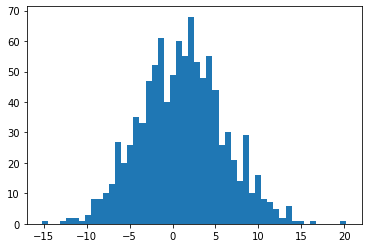

In [3]:
# make the histogram
plt.hist(X, bins=50)
plt.show()

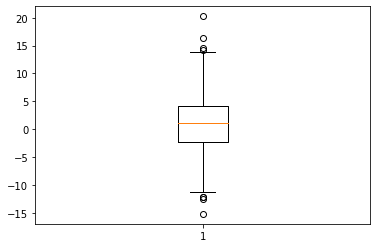

In [4]:
# make the box-plot
plt.boxplot(X)
plt.show()

In [5]:
# mean
x_mean = np.mean(X)
x_mean

1.0966602791116276

In [6]:
# median
x_median = np.median(X)
x_median

1.1265030611744413

In [7]:
# quantile
x_25th_quantile = np.quantile(X, q=0.25)
x_25th_quantile

-2.2379515273117585

In [8]:
x_50th_quantile = np.quantile(X, q=0.5)
x_50th_quantile

1.1265030611744413

In [9]:
# sample variance
x_var = np.var(X, ddof=1)
x_var

23.97159633962756

In [10]:
# standard deviation
np.sqrt(x_var)

4.896079690898378

In [11]:
np.std(X, ddof=1)

4.896079690898378

## Central Limit Theorem

In [12]:
n_trials = 1000
n_samples = 100

The mean of sample means is: 1.001.
The standard deviation of sample means is: 0.104.


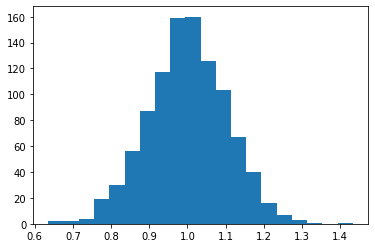

In [13]:
# normal distribution
sample_means = []
for _ in range(n_trials):
    X = np.random.normal(loc=1.0, scale=1.0, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

The mean of sample means is: 0.597.
The standard deviation of sample means is: 0.049.


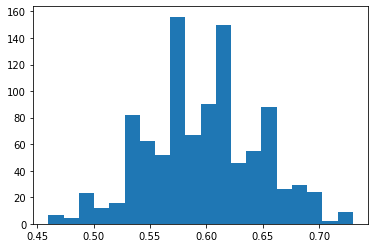

In [14]:
# bernoulli distribution
sample_means = []
p = 0.6
for _ in range(n_trials):
    X = np.random.random(size=n_samples)
    X = [1 if x < p else 0 for x in X]
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

The mean of sample means is: 5.999.
The standard deviation of sample means is: 0.157.


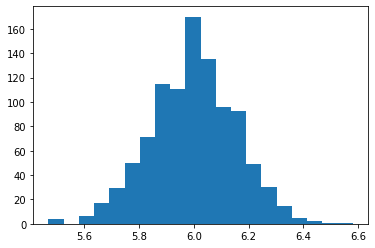

In [15]:
# binomial distribtuion
sample_means = []
for _ in range(n_trials):
    X = np.random.binomial(n=10, p=0.6, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

The mean of sample means is: 1.665.
The standard deviation of sample means is: 0.107.


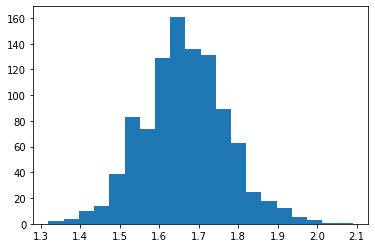

In [16]:
# geometric distribution
sample_means = []
for _ in range(n_trials):
    X = np.random.geometric(p=0.6, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

## Point estimation and confidence interval

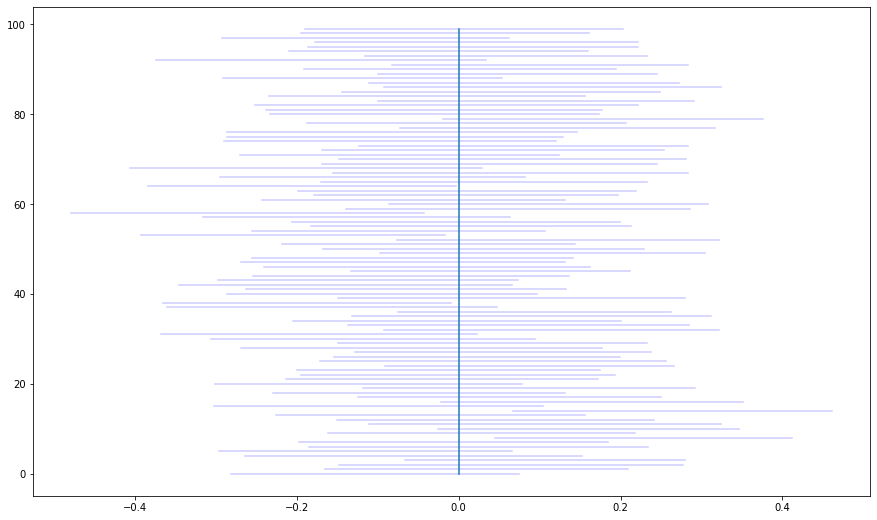

In [17]:
np.random.seed(42)

n_trials = 100
n_samples = 100
mu = 0
sigma = 1

results = []
for i, _ in enumerate(range(n_trials)):
    X = np.random.normal(loc=mu, scale=sigma**0.5, size=n_samples)
    lower_bound = np.mean(X) - 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)
    upper_bound = np.mean(X) + 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)
    
    results.append((i, lower_bound, upper_bound))
    
plt.figure(figsize=(15, 9))
for i, lower, upper in results:
    plt.plot([lower, upper], [i] * 2, color="blue", alpha=0.2)
plt.plot([mu] * len(results), list(range(len(results))))
plt.show()

## Hypothesis test

In [18]:
# fair coin, binomial test
n = 10
p = 0.5
for k in range(11):
    proba = binom.pmf(k=k, n=n, p=p)
    print(f"The probability of getting {k} head(s) is: {proba:5.3f}")

The probability of getting 0 head(s) is: 0.001
The probability of getting 1 head(s) is: 0.010
The probability of getting 2 head(s) is: 0.044
The probability of getting 3 head(s) is: 0.117
The probability of getting 4 head(s) is: 0.205
The probability of getting 5 head(s) is: 0.246
The probability of getting 6 head(s) is: 0.205
The probability of getting 7 head(s) is: 0.117
The probability of getting 8 head(s) is: 0.044
The probability of getting 9 head(s) is: 0.010
The probability of getting 10 head(s) is: 0.001


The critial value is 107.802.
The power of the test is 0.678.


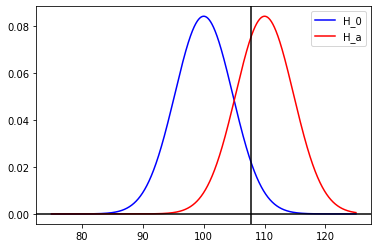

In [23]:
# IQ example
n = 10
mu_0 = 100
mu_a = 110
sigma = 15
alpha = 0.05  # Type I error rate


x_range = np.arange(75, 125, 0.001)
plt.plot(
    x_range, 
    norm.pdf(x_range, loc=mu_0, scale=np.sqrt(sigma**2 / n)),
    color="blue",
    label="H_0"
)

plt.plot(
    x_range, 
    norm.pdf(x_range, loc=mu_a, scale=np.sqrt(sigma**2 / n)),
    color="red",
    label="H_a"
)

# find the rejection region
x_critical = norm.ppf(q=(1 - alpha), loc=mu_0, scale=np.sqrt(sigma**2 / n))
power = norm.sf(x=x_critical, loc=mu_a, scale=np.sqrt(sigma**2 / n))

print(f"The critial value is {x_critical:5.3f}.")
print(f"The power of the test is {power:5.3f}.")
plt.axvline(x=x_critical, color="black")

plt.axhline(y=0, color="black")
plt.legend()
plt.show()

In [20]:
# Get the p-value
norm.sf(x=110, loc=mu_0, scale=np.sqrt(sigma / n))

0.017507490509831244

The critial value is 1.960.
The power of the test is 0.738.


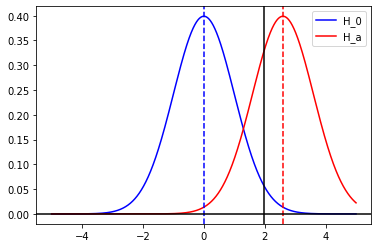

In [36]:
# 2-sample test
x_mean = 100
y_mean = 105
s_x = 10
s_y = 10
n_x = 150
n_y = 150

delta = 3
alpha = 0.05

s_pool = np.sqrt(s_x**2 / n_x + s_y**2 / n_y)

z_range = np.arange(-5, 5, 0.001)
plt.plot(
    z_range, 
    norm.pdf(z_range, loc=0, scale=1),
    color="blue",
    label="H_0"
)

plt.plot(
    z_range, 
    norm.pdf(z_range, loc=(delta / s_pool), scale=1),
    color="red",
    label="H_a"
)

# use q=(1 - alpha) for one-sided test
z_critical = norm.ppf(q=(1 - alpha / 2))
power = norm.sf(x=z_critical, loc=(delta / s_pool), scale=1)

print(f"The critial value is {z_critical:5.3f}.")
print(f"The power of the test is {power:5.3f}.")
plt.axvline(x=z_critical, color="black")
plt.axvline(x=0, color="blue", linestyle="--")
plt.axvline(x=(delta / s_pool), color="red", linestyle="--")

plt.axhline(y=0, color="black")
plt.legend()
plt.show()